In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
from skimage import transform

import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras import layers, models
from tensorflow.keras.utils import to_categorical

from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split


## Load MNIST dataset

In [2]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images = train_images.reshape((60000, 28, 28, 1)).astype('float32') / 255
test_images = test_images.reshape((10000, 28, 28, 1)).astype('float32') / 255

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

# Split the data into training and validation sets
val_split = 0.2
val_size = int(val_split * len(train_images))

val_images = train_images[:val_size]
val_labels = train_labels[:val_size]

train_images = train_images[val_size:]
train_labels = train_labels[val_size:]

# Part 1

## Build the MLP model

In [3]:
model = models.Sequential()
model.add(layers.Flatten(input_shape=(28, 28, 1)))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.5))  # Optional dropout for regularization
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(train_images, train_labels, 
                    epochs=25, batch_size=128, 
                    validation_data=(val_images, val_labels)
                    )

Epoch 1/25
375/375 [==============================] - 2s 3ms/step - loss: 0.5457 - accuracy: 0.8333 - val_loss: 0.2221 - val_accuracy: 0.9354
Epoch 2/25
375/375 [==============================] - 1s 3ms/step - loss: 0.2725 - accuracy: 0.9176 - val_loss: 0.1590 - val_accuracy: 0.9523
Epoch 3/25
375/375 [==============================] - 1s 3ms/step - loss: 0.2218 - accuracy: 0.9324 - val_loss: 0.1377 - val_accuracy: 0.9596
Epoch 4/25
375/375 [==============================] - 1s 3ms/step - loss: 0.1899 - accuracy: 0.9425 - val_loss: 0.1209 - val_accuracy: 0.9659
Epoch 5/25
375/375 [==============================] - 1s 3ms/step - loss: 0.1698 - accuracy: 0.9468 - val_loss: 0.1099 - val_accuracy: 0.9685
Epoch 6/25
375/375 [==============================] - 1s 3ms/step - loss: 0.1585 - accuracy: 0.9513 - val_loss: 0.1068 - val_accuracy: 0.9682
Epoch 7/25
375/375 [==============================] - 1s 3ms/step - loss: 0.1443 - accuracy: 0.9564 - val_loss: 0.1013 - val_accuracy: 0.9696
Epoch 

In [4]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_2 (Dense)              (None, 10)                650       
Total params: 109,386
Trainable params: 109,386
Non-trainable params: 0
_________________________________________________________________


### Plot the learning curve

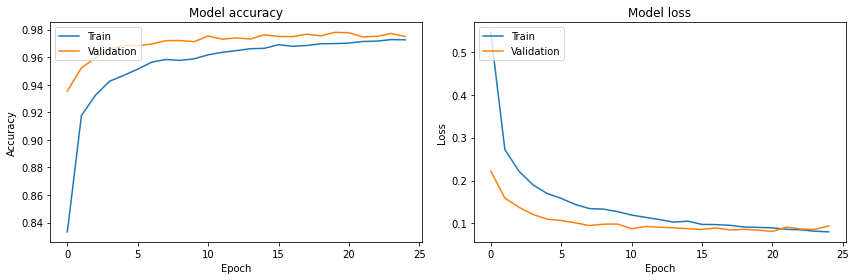

In [5]:
plt.figure(figsize=(12, 4))

# Plot training & validation accuracy values
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()

### Evaluate the model on test data


313/313 [==============================] - 1s 2ms/step - loss: 0.0885 - accuracy: 0.9764
Test Accuracy: 0.9764000177383423


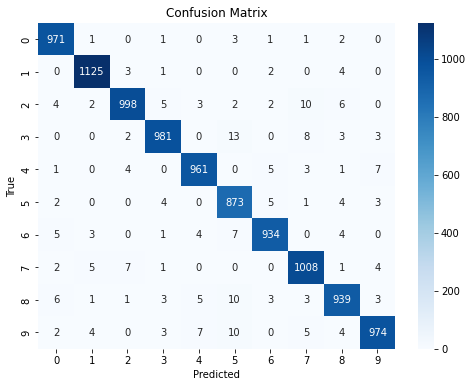

In [6]:
test_loss, test_accuracy = model.evaluate(test_images, test_labels)
print(f'Test Accuracy: {test_accuracy}')

# Predictions on test data
predictions = model.predict(test_images)

# Convert predictions and true labels back from one-hot encoding
predicted_labels = np.argmax(predictions, axis=1)
true_labels = np.argmax(test_labels, axis=1)

# Create confusion matrix
conf_matrix = confusion_matrix(true_labels, predicted_labels)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=range(10), yticklabels=range(10))
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Part 2

## Build the CNN model

In [7]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(train_images, train_labels, 
                    epochs=25, batch_size=128, 
                    validation_data=(val_images, val_labels)
                    )

Epoch 1/25
375/375 [==============================] - 5s 6ms/step - loss: 0.2730 - accuracy: 0.9169 - val_loss: 0.0888 - val_accuracy: 0.9739
Epoch 2/25
375/375 [==============================] - 2s 6ms/step - loss: 0.0667 - accuracy: 0.9792 - val_loss: 0.0618 - val_accuracy: 0.9805
Epoch 3/25
375/375 [==============================] - 2s 5ms/step - loss: 0.0481 - accuracy: 0.9851 - val_loss: 0.0564 - val_accuracy: 0.9830
Epoch 4/25
375/375 [==============================] - 2s 5ms/step - loss: 0.0368 - accuracy: 0.9881 - val_loss: 0.0582 - val_accuracy: 0.9818
Epoch 5/25
375/375 [==============================] - 2s 5ms/step - loss: 0.0296 - accuracy: 0.9910 - val_loss: 0.0418 - val_accuracy: 0.9877
Epoch 6/25
375/375 [==============================] - 2s 5ms/step - loss: 0.0241 - accuracy: 0.9920 - val_loss: 0.0392 - val_accuracy: 0.9881
Epoch 7/25
375/375 [==============================] - 2s 5ms/step - loss: 0.0187 - accuracy: 0.9940 - val_loss: 0.0430 - val_accuracy: 0.9881
Epoch 

In [8]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten_1 (Flatten)          (None, 576)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 64)               

### Plot the learning curve

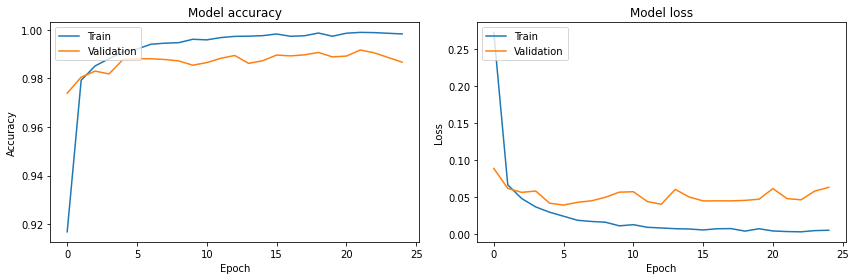

In [9]:
plt.figure(figsize=(12, 4))

# Plot training & validation accuracy values
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()

### Evaluate the model on test data


313/313 [==============================] - 1s 3ms/step - loss: 0.0529 - accuracy: 0.9898
Test Accuracy: 0.989799976348877


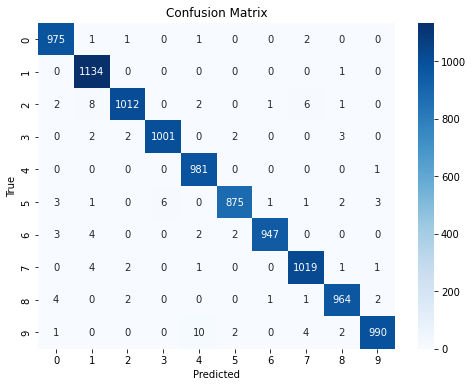

In [10]:
test_loss, test_accuracy = model.evaluate(test_images, test_labels)
print(f'Test Accuracy: {test_accuracy}')

# Predictions on test data
predictions = model.predict(test_images)

# Convert predictions and true labels back from one-hot encoding
predicted_labels = np.argmax(predictions, axis=1)
true_labels = np.argmax(test_labels, axis=1)

# Create confusion matrix
conf_matrix = confusion_matrix(true_labels, predicted_labels)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=range(10), yticklabels=range(10))
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Part 3

In [3]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

num_train = 10000

# Reshaping the data to 28x28x1
x_train = x_train[:num_train].reshape((-1, 28, 28, 1))
y_train = y_train[:num_train].reshape((-1,))
x_test = x_test.reshape((-1, 28, 28, 1))
y_test = y_test.reshape((-1,))

# Normalizing the data
x_train = (x_train - 127.5) / 127.5
x_test = (x_test - 127.5) / 127.5

# Convert 28x28x1 to 28x28x3
x_train = tf.image.grayscale_to_rgb(
    tf.convert_to_tensor(x_train),
    name=None)

x_test = tf.image.grayscale_to_rgb(
    tf.convert_to_tensor(x_test),
    name=None)

In [4]:
# Resizing every image to 32x32x3 from 28x28x3
x_train = [transform.resize(x, (96, 96, 3)) for x in x_train]
x_test = [transform.resize(x, (96, 96, 3)) for x in x_test]

x_train = np.asarray(x_train)
x_test = np.asarray(x_test)

In [5]:
print("Shape of X Train : ", x_train.shape)
print("Shape of X Test : ", x_test.shape)

Shape of X Train :  (10000, 96, 96, 3)
Shape of X Test :  (10000, 96, 96, 3)


In [6]:
# One-Hot encoding the labels
y_train = np.uint8(to_categorical(y_train, num_classes = 10))
y_test = np.uint8(to_categorical(y_test, num_classes = 10))

In [7]:
x_train, x_valid, y_train, y_valid = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

In [8]:
from tensorflow.keras.applications import MobileNetV2

baseModel = MobileNetV2(weights="imagenet", include_top=False,input_tensor=layers.Input(shape=(96, 96, 3)))

for layer in baseModel.layers:
    layer.trainable = False

In [9]:
#Adding the final dense layers to the pretrained model
modelHead = baseModel.output
modelHead = layers.MaxPooling2D(pool_size=(3, 3))(modelHead)
modelHead = layers.Flatten(name="flatten")(modelHead)
modelHead = layers.Dense(128, activation="relu")(modelHead)
modelHead = layers.Dense(32, activation="relu")(modelHead)
modelHead = layers.Dense(10, activation="softmax")(modelHead)

model = models.Model(inputs=baseModel.input, outputs=modelHead)

model.compile(loss = "categorical_crossentropy", optimizer='adam', metrics=["accuracy"])

history = model.fit(x_train, y_train,
                    epochs = 25,
                    batch_size = 128,
                    validation_data = (x_valid, y_valid), 
                    )

Epoch 1/25
63/63 [==============================] - 11s 69ms/step - loss: 2.8078 - accuracy: 0.2943 - val_loss: 1.4322 - val_accuracy: 0.4840
Epoch 2/25
63/63 [==============================] - 3s 41ms/step - loss: 1.1609 - accuracy: 0.6191 - val_loss: 1.0141 - val_accuracy: 0.6615
Epoch 3/25
63/63 [==============================] - 3s 43ms/step - loss: 0.9030 - accuracy: 0.7099 - val_loss: 0.8831 - val_accuracy: 0.7435
Epoch 4/25
63/63 [==============================] - 3s 44ms/step - loss: 0.7160 - accuracy: 0.7796 - val_loss: 0.6477 - val_accuracy: 0.7865
Epoch 5/25
63/63 [==============================] - 3s 46ms/step - loss: 0.6139 - accuracy: 0.8117 - val_loss: 0.5556 - val_accuracy: 0.8280
Epoch 6/25
63/63 [==============================] - 3s 44ms/step - loss: 0.5357 - accuracy: 0.8360 - val_loss: 0.4595 - val_accuracy: 0.8605
Epoch 7/25
63/63 [==============================] - 3s 44ms/step - loss: 0.4498 - accuracy: 0.8699 - val_loss: 0.4117 - val_accuracy: 0.8735
Epoch 8/25
6

In [10]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 96, 96, 3)]  0                                            
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 48, 48, 32)   864         input_1[0][0]                    
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, 48, 48, 32)   128         Conv1[0][0]                      
__________________________________________________________________________________________________
Conv1_relu (ReLU)               (None, 48, 48, 32)   0           bn_Conv1[0][0]                   
______________________________________________________________________________________________

### Plot the learning curve


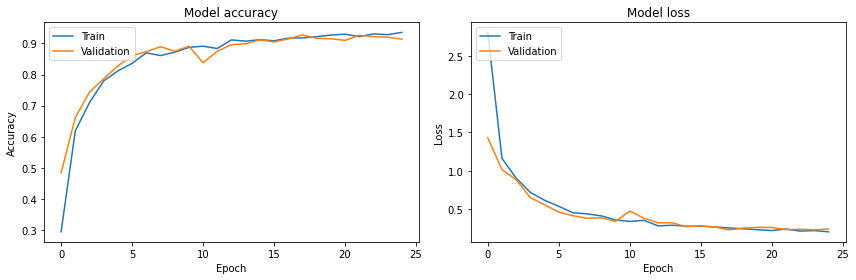

In [14]:
plt.figure(figsize=(12, 4))

# Plot training & validation accuracy values
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()

### Evaluate the model on test data


313/313 [==============================] - 5s 15ms/step - loss: 0.2612 - accuracy: 0.9138
Test Accuracy: 0.9138000011444092


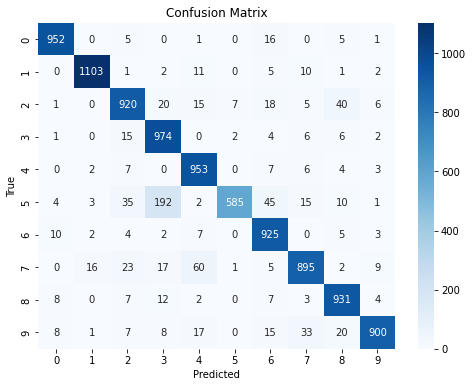

In [12]:
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f'Test Accuracy: {test_accuracy}')

# Predictions on test data
predictions = model.predict(x_test)

# Convert predictions and true labels back from one-hot encoding
predicted_labels = np.argmax(predictions, axis=1)
true_labels = np.argmax(y_test, axis=1)

# Create confusion matrix
conf_matrix = confusion_matrix(true_labels, predicted_labels)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=range(10), yticklabels=range(10))
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()